# Import Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dfVoice = pd.read_csv('voice.csv');
dfVoice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
dfVoice['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

# EDA

In [7]:
dfVoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [8]:
dfVoice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [9]:
dfVoice[dfVoice['dfrange'] > 20]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1011,0.192989,0.070569,0.222416,0.128270,0.253188,0.124918,2.682818,11.566791,0.927718,0.577478,...,0.192989,0.128908,0.047337,0.279070,1.202206,0.023438,20.484375,20.460938,0.055165,male
1086,0.196590,0.057834,0.214406,0.134126,0.245734,0.111608,1.522354,5.287497,0.903398,0.291057,...,0.196590,0.124676,0.047244,0.277457,1.468229,0.023438,21.515625,21.492188,0.082438,male
1114,0.175311,0.068150,0.160749,0.127551,0.241997,0.114446,1.438899,4.568239,0.939701,0.599018,...,0.175311,0.133196,0.047105,0.271186,1.479992,0.023438,21.867188,21.843750,0.074511,male
1448,0.178261,0.062283,0.179499,0.138831,0.233255,0.094424,1.464983,5.498037,0.925515,0.460198,...,0.178261,0.128866,0.050580,0.277457,1.635298,0.023438,21.843750,21.820312,0.053843,male
2342,0.230992,0.031246,0.229988,0.214678,0.251762,0.037084,1.890016,5.971598,0.834185,0.140839,...,0.230992,0.191741,0.047291,0.277457,2.288628,0.023438,21.796875,21.773438,0.111634,female
2362,0.229129,0.031968,0.232010,0.216856,0.246804,0.029948,2.360172,8.994627,0.835542,0.166957,...,0.229129,0.166136,0.049281,0.271186,1.480674,0.093750,20.976562,20.882812,0.076552,female
2547,0.200742,0.035396,0.200833,0.182083,0.224583,0.042500,1.873618,5.842669,0.864797,0.250955,...,0.200742,0.176234,0.049080,0.268156,1.317555,0.023438,21.562500,21.539062,0.035075,female
2576,0.220121,0.029492,0.222936,0.205043,0.232608,0.027565,3.345215,16.062448,0.806673,0.148746,...,0.220121,0.182577,0.047666,0.279070,2.122044,0.210938,20.414062,20.203125,0.070653,female
2637,0.213664,0.035410,0.222989,0.194483,0.234943,0.040460,2.397614,8.808855,0.849510,0.238105,...,0.213664,0.171509,0.050367,0.268156,1.177020,0.023438,20.414062,20.390625,0.043391,female
2686,0.190402,0.052902,0.175446,0.147723,0.239208,0.091485,1.964236,8.318117,0.899798,0.333411,...,0.190402,0.148943,0.047856,0.275862,1.887784,0.023438,20.625000,20.601562,0.094733,female


In [10]:
listItem = []
for col in dfVoice.columns :
    listItem.append([col, dfVoice[col].dtype, dfVoice[col].isna().sum(), round((dfVoice[col].isna().sum()/len(dfVoice[col])) * 100,2),
                    dfVoice[col].nunique(), list(dfVoice[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,meanfreq,float64,0,0.0,3166,"[0.19049380289935297, 0.197072515188387]"
1,sd,float64,0,0.0,3166,"[0.0537735426722375, 0.0612675740813351]"
2,median,float64,0,0.0,3077,"[0.21530303030303002, 0.23862348178137696]"
3,Q25,float64,0,0.0,3103,"[0.10110330992978901, 0.17559645535105703]"
4,Q75,float64,0,0.0,3034,"[0.250068965517241, 0.212511210762332]"
5,IQR,float64,0,0.0,3073,"[0.0822018348623853, 0.11589482612383399]"
6,skew,float64,0,0.0,3166,"[1.22387821559047, 2.94200396689367]"
7,kurt,float64,0,0.0,3166,"[4.68398485433862, 43.681885425165206]"
8,sp.ent,float64,0,0.0,3166,"[0.88076300701501, 0.911274523837184]"
9,sfm,float64,0,0.0,3166,"[0.23240556988836397, 0.34354832402836405]"


In [6]:
dfVoice['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

C:\Users\MSI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


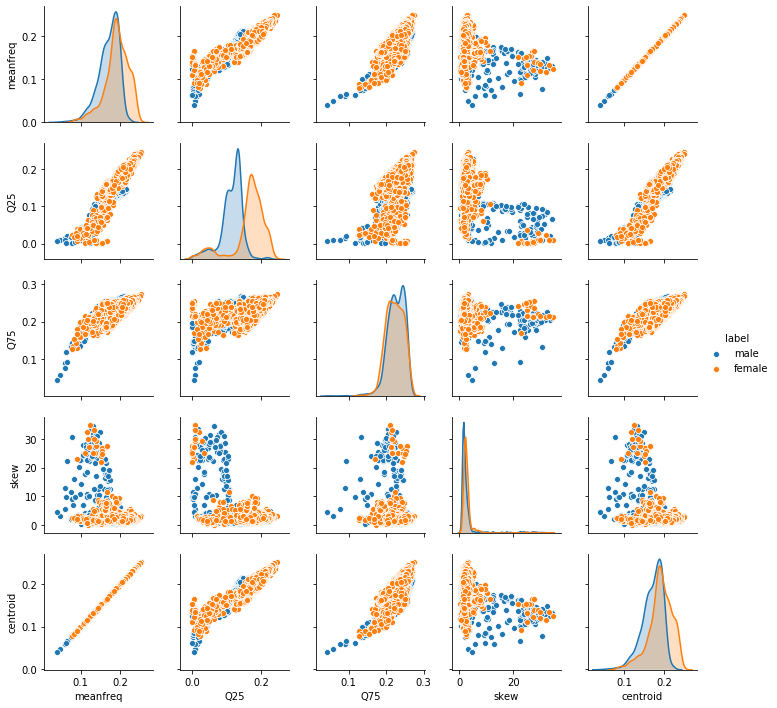

In [11]:
sns.pairplot(dfVoice[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], 
                 hue='label', size=2)

# Preprocessing Data and Splitting

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = dfVoice.drop('label', axis=1)
target = dfVoice['label']

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
target = gender_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=101)

# Pipeline (StandardScaler,PCA,XGBoost)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

pipe_xgb = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('xgb', XGBClassifier(random_state=101))])

pipe_xgb.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))

Test Accuracy: 0.965


In [26]:
print(pipe_xgb.steps[2][1])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [24]:
pipe_xgb

Pipeline(memory=None,
         steps=[('std_scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=101,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
         

In [22]:
predict = pipe_xgb.predict(X_train)

con = pd.DataFrame(data=confusion_matrix(y_train,predict), columns=['P Female', 'P Male'], index=['A Female', 'A Male']);
print(con)
print(classification_report(y_train, predict))

          P Female  P Male
A Female      1109      12
A Male          11    1085
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1121
           1       0.99      0.99      0.99      1096

    accuracy                           0.99      2217
   macro avg       0.99      0.99      0.99      2217
weighted avg       0.99      0.99      0.99      2217



In [23]:
predict = pipe_xgb.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predict), columns=['P Female', 'P Male'], index=['A Female', 'A Male']);
print(con)
print(classification_report(y_test, predict))

          P Female  P Male
A Female       446      17
A Male          16     472
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       463
           1       0.97      0.97      0.97       488

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



In [27]:
pipe_xgb.steps[2][1].feature_importances_

array([0.2231066 , 0.14974898, 0.02135119, 0.12064288, 0.17252016,
       0.032438  , 0.09860235, 0.02002157, 0.1486244 , 0.01294393],
      dtype=float32)

## Cross Validation Score

Cross validation scores: [0.9915527  0.99407468 0.98863636 0.99813312 0.99780844 0.99780844
 0.99565858 0.99221822 0.99664155 0.98926933]


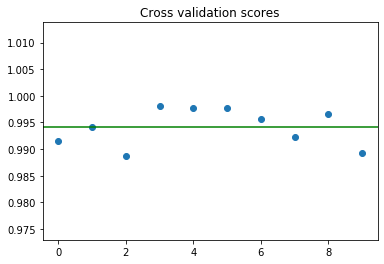

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_xgb,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1,
                        scoring = 'roc_auc')

print('Cross validation scores: %s' % scores)

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

In [34]:
np.linspace(0.5, 1.0, 5)

array([0.5  , 0.625, 0.75 , 0.875, 1.   ])

## Learning Curve

train scores:

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [0.99775407 0.99887704 0.99775407 0.99719259 0.99887704 0.99494666
  0.99663111 0.99550814 0.99550814 0.99719259]
 [0.99766027 0.99532054 0.9948526  0.99578849 0.99953205 0.99251287
  0.99251287 0.99157698 0.99251287 0.99204492]
 [0.99518652 0.99518652 0.99598877 0.99598877 0.99518652 0.99438428
  0.99398315 0.99358203 0.99398315 0.99318091]
 [0.99403509 0.98912281 0.98912281 0.99157895 0.99087719 0.98982456
  0.98912281 0.98807018 0.9922807  0.98947368]]
train mean:

[1.         0.99702414 0.99443145 0.99466506 0.99035088]
train sizes:

[1425 1781 2137 2493 2850]
train std:

[0.         0.00130597 0.00253253 0.00093299 0.00172787]
test scores:

[[0.5        0.5        0.5        0.5        0.5        0.5
  0.5        0.5        0.5        0.5       ]
 [0.92138365 0.97169811 0.9245283  0.86163522 0.81012658 0.76898734
  0.7721519  0.73734177 0.7056962  0.94936709]


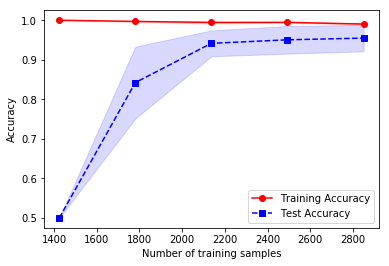

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_xgb,
                                                       X=data,
                                                       y=target,
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)
print('train scores:\n')
print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print('train mean:\n')

print(train_mean)
print('train sizes:\n')
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)
print('train std:\n')
print(train_std)

# Same as above for test data
print('test scores:\n')
print(test_scores)
print('test mean:\n')
test_mean = np.mean(test_scores, axis=1)
print(test_mean)
test_std = np.std(test_scores, axis=1)
print('test std')
print(test_std)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Gridsearch

In [16]:
from sklearn.model_selection import GridSearchCV

param_learning = (0.12, 0.1, 0.08, 0.06)
param_estimator = (80,100,120,140)
param_grid = {'learning_rate': param_learning, 'n_estimators':param_estimator}

gs = GridSearchCV(pipe_xgb.steps[2][1],param_grid,scoring='accuracy')

# Training and searching hyper parameter space and evaluating model
# by using cross validation logic folded into 10
gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9788001804239964
{'learning_rate': 0.1, 'n_estimators': 120}


In [35]:
pipe_xgb = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('xgb', XGBClassifier(random_state=101, n_estimators=120))])

pipe_xgb.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_xgb.score(X_test, y_test))

Test Accuracy: 0.966


In [18]:
predict = pipe_xgb.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test,predict), columns=['P Female', 'P Male'], index=['A Female', 'A Male']);
print(con)
print(classification_report(y_test, predict))

          P Female  P Male
A Female       446      17
A Male          15     473
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       463
           1       0.97      0.97      0.97       488

   micro avg       0.97      0.97      0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951



# Model Deployment

In [36]:
import pickle
filename = 'pipe_voice_recog.sav'
pickle.dump(pipe_xgb, open(filename, 'wb'))

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 120, learning_rate = 0.7)

In [29]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.7, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [30]:
predict = gbc.predict(X_train)

con = pd.DataFrame(data = confusion_matrix(y_train, predict), columns =['P Female', 'P Male'], index = ['A Female', 'A Male'])
print(con)
print(classification_report(y_train, predict))

          P Female  P Male
A Female      1121       0
A Male           0    1096
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1121
           1       1.00      1.00      1.00      1096

   micro avg       1.00      1.00      1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217



In [32]:
predict = gbc.predict(X_test)

con = pd.DataFrame(data = confusion_matrix(y_test, predict), columns =['P Female', 'P Male'], index = ['A Female', 'A Male'])
print(con)
print(classification_report(y_test, predict))

          P Female  P Male
A Female       452      11
A Male          12     476
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       463
           1       0.98      0.98      0.98       488

   micro avg       0.98      0.98      0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

